In [1]:
import os
import glob
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns

sys.path.append('../')
import src.utils as my_u
from src.utils import df_cp
from src.utils import df_log
from src.utils import df_total20000
from src.utils import df_minmax
from src.utils import df_minmax_scaler
from src.utils import df_l2norm
from src.utils import df_zscore
from src.utils import df_meansquare
from src.utils import run_plot


In [2]:
file_list = glob.glob("../dataset/baron/RAW/*human*counts.csv")
print(file_list)
total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep=',', index_col=0, header=0)
    total_data = total_data.append(data)
    print(total_data.shape)

labels = total_data['assigned_cluster'].values.tolist()
label_set = set(labels)
print(label_set)

total_data = total_data.iloc[:,2:]
del(data)

['../dataset/baron/RAW/GSM2230758_human2_umifm_counts.csv', '../dataset/baron/RAW/GSM2230759_human3_umifm_counts.csv', '../dataset/baron/RAW/GSM2230760_human4_umifm_counts.csv', '../dataset/baron/RAW/GSM2230757_human1_umifm_counts.csv']
(1724, 20127)
(5329, 20127)
(6632, 20127)
(8569, 20127)
{'quiescent_stellate', 'epsilon', 'delta', 'endothelial', 'macrophage', 'ductal', 'activated_stellate', 'acinar', 'mast', 'gamma', 't_cell', 'beta', 'schwann', 'alpha'}


In [3]:
bk = total_data
bk_lab = labels

In [4]:
file_list = glob.glob("../dataset/muraro/RAW/data.csv")
print(file_list)

total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=0)
    total_data = total_data.append(data)
    print(total_data.shape)

new_index = []
tmp_index = total_data.index
for ll in tmp_index:
    new_index.append(ll.split("__")[0])
total_data.index = new_index


labels = pd.read_csv('../dataset/muraro/RAW/cell_type_annotation_Cels2016.csv', sep='\t', index_col=0)
labels.columns = ['labels']
label_colname = labels.columns[0]
labels.index = [l.replace(".","-") for l in labels.index]
labels = labels.transpose().filter(items=total_data.columns)
#labels = labels[0]

total_data = total_data.append(labels)
total_data = total_data.transpose()
#print(total_data)
total_data[label_colname] = total_data[label_colname].replace(np.nan, 'nolabel')
label_set = set(labels)
#print(len(labels))

us = total_data[label_colname] != 'nolabel'
total_data = total_data.loc[us,]
labels = total_data[label_colname]
total_data.pop(label_colname)
total_data = total_data.astype('float32')
#print(total_data)

labels = labels.values.tolist()

del(data)

['../dataset/muraro/RAW/data.csv']
(19140, 3072)


In [5]:
bk2 = total_data
bk_lab2 = labels

In [6]:
file_list = glob.glob("../dataset/segerstolpe/RAW/cut_exp.csv")
print(file_list)
LABEL = 'Characteristics[cell_type]'
total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=0)
    total_data = total_data.append(data)
    print(total_data.shape)

labels = pd.read_csv('../dataset/segerstolpe/RAW/E-MTAB-5061.sdrf.txt', sep='\t', index_col=0, header=0)
labels = labels[LABEL]
print(set(labels))

total_data = total_data.iloc[:,1:]
total_data = total_data.append(labels.transpose())

## ERCC cleaning
genes = total_data.index
ercc_list = []
for g in genes:
    if 'ERCC' in g:
        ercc_list.append(g)
print(len(ercc_list))
print(total_data.shape)
total_data = total_data.drop(ercc_list, axis=0)
print(total_data.shape)

total_data=total_data.transpose()

test = total_data.loc[total_data[LABEL] != 'not_applicable',]
print(test.shape)
test = test.loc[total_data[LABEL] != 'unclassified_cell',]
print(test.shape)
test = test.loc[total_data[LABEL] != 'unclassified_endocrine_cell',]
print(test.shape)
total_data = test

labels = total_data[LABEL]
labels = labels.values.tolist()
total_data.pop(LABEL)
total_data.pop('eGFP')
total_data = total_data.astype('float32')
print(set(labels))

del(test)
del(data)

['../dataset/segerstolpe/RAW/cut_exp.csv']
(26271, 3515)
{'mast_cell', 'acinar_cell', 'PSC_cell', 'alpha_cell', 'ductal_cell', 'gamma_cell', 'unclassified_cell', 'unclassified_endocrine_cell', 'endothelial_cell', 'delta_cell', 'not_applicable', 'MHC_class_II_cell', 'beta_cell', 'co-expression_cell', 'epsilon_cell'}
105
(26272, 3514)
(26167, 3514)
(2209, 26167)
(2207, 26167)
(2166, 26167)
{'mast_cell', 'acinar_cell', 'alpha_cell', 'gamma_cell', 'ductal_cell', 'endothelial_cell', 'delta_cell', 'PSC_cell', 'beta_cell', 'MHC_class_II_cell', 'co-expression_cell', 'epsilon_cell'}


In [7]:
bk3 = total_data
bk_lab3 = labels

In [8]:

file_list = glob.glob("../dataset/wang/RAW/GSE83139_tbx-v-f-norm-ntv-cpms.csv")
print(file_list)

LABEL = 'Sample_characteristics_ch1'

total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=6)
    total_data = total_data.append(data)
    print(total_data.shape)

labels = pd.read_csv('../dataset/wang/RAW/label.txt', sep='\t', index_col=0)
labels2 = pd.read_csv('../dataset/wang/RAW/label2.txt', sep='\t', index_col=0)
labels = pd.concat([labels,labels2],axis=1)

labels.columns = [k.split("_")[1] for k in labels.columns]

#labels = labels[LABEL]
total_data = total_data.iloc[:,6:]
total_data.columns = [k.split(".")[1] for k in total_data.columns]

total_data = total_data.append(labels)
total_data=total_data.transpose()

total_data = total_data.loc[total_data[LABEL] != 'dropped',]
print(total_data.shape)

labels = total_data[LABEL]
labels = labels.values.tolist()
total_data.pop(LABEL)



total_data = total_data.astype('float32')
print(set(labels))

del(data)

['../dataset/wang/RAW/GSE83139_tbx-v-f-norm-ntv-cpms.csv']
(19950, 641)
(457, 19951)
{'pp', 'delta', 'mesenchyme', 'duct', 'acinar', 'beta', 'alpha'}


In [9]:
bk4 = total_data
bk_lab4 = labels

In [10]:

file_list = glob.glob("../dataset/xin/RAW/data.txt")
print(file_list)
LABEL = 'cell.type'

total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=0)
    total_data = total_data.append(data)
    print(total_data.shape)

gene_anno = pd.read_csv('../dataset/xin/RAW/human_gene_annotation.csv', sep=",", index_col=0)

total_data = pd.concat([gene_anno, total_data], axis=1)
total_data.set_index('symbol', inplace=True)


labels = pd.read_csv('../dataset/xin/RAW/human_islet_cell_identity.txt', sep='\t', index_col=0)
labels = labels[LABEL]

#total_data = total_data.iloc[:,1:]
#total_data.columns = [k.split(".")[1] for k in total_data.columns]

total_data = total_data.append(labels)
total_data=total_data.transpose()
#print(total_data)

labels = total_data[LABEL].values.tolist()
total_data.pop(LABEL)
total_data = total_data.astype('float32')
#print(total_data)

del(data)

['../dataset/xin/RAW/data.txt']
(39851, 1600)


In [11]:
bk5 = total_data
bk_lab5 = labels

In [12]:
print((bk3.columns))

Index(['SGIP1', 'AZIN2', 'CLIC4', 'AGBL4', 'NECAP2', 'SLC45A1', 'TGFBR3',
       'DBT', 'RFWD2', 'C1orf21',
       ...
       'KIR2DS5', 'KIR2DL5A', 'KIR3DS1', 'KIR2DL5B', 'KIR2DS2', 'KIR2DS1',
       'KIR2DL2', 'KIR2DL4', 'KIR2DS3', 'KIR2DS2'],
      dtype='object', name='#samples', length=26165)


In [13]:
bk2 = bk2.loc[:,~bk2.columns.duplicated(keep='first')]
bk3 = bk3.loc[:,~bk3.columns.duplicated(keep='first')]
#bk4 = bk4.loc[:,~bk4.columns.duplicated(keep='first')]
#bk5 = bk5.loc[:,~bk5.columns.duplicated(keep='first')]


In [14]:
print(len(bk.columns))
wbk = (bk.columns).intersection(bk2.columns)
print(len(wbk))
wbk = wbk.intersection(bk3.columns)
print(len(wbk))
wbk = wbk.intersection(bk4.columns)
print(len(wbk))
wbk = wbk.intersection(bk5.columns)
print(len(wbk))


baron = bk.filter(wbk)
muraro= bk2.filter(wbk)
seg = bk3.filter(wbk)
wang = bk4.filter(wbk)
xin = bk5.filter(wbk)

20125
16602
16579
15632
15628


In [15]:
total_data = pd.concat([baron,muraro,seg,wang,xin],axis=0)
labels = bk_lab + bk_lab2 + bk_lab3 + bk_lab4 + bk_lab5
blabels = ['inDrop']*len(bk_lab) + ['CEL-Seq2']*len(bk_lab2) + ['Smart-Seq2']*len(bk_lab3) + ['SMARTer']*len(bk_lab4) + ['Fluidigm C1']*len(bk_lab5)

In [16]:
del(baron, muraro, seg, wang, xin, bk, bk2, bk3, bk4, bk5)
print(total_data.shape)
print(len(labels))
print(set(labels))
j = set(bk_lab)
j.remove('t_cell')
j = [x.split('_')[0] for x in j]
l = (set(labels) and j) 
print(l)
labels = [x.split('_')[0] for x in labels]

k = [True if (x in j) else False for x in labels ]
total_data = total_data.loc[k,:]
print(total_data.shape)

from itertools import compress
labels = list(compress(labels, k))
print(set(labels))
blabels = list(compress(blabels,k))

(14918, 15628)
14918
{'alpha.contaminated', 'alpha_cell', 'gamma_cell', 'delta.contaminated', 'duct', 'PP', 'schwann', 'unclear', 'epsilon_cell', 'acinar_cell', 'macrophage', 'mast', 'mesenchymal', 'alpha', 'PSC_cell', 'quiescent_stellate', 'ductal_cell', 'epsilon', 'delta', 'endothelial', 'pp', 'endothelial_cell', 'ductal', 'activated_stellate', 'acinar', 'PP.contaminated', 'gamma', 'delta_cell', 'co-expression_cell', 'mast_cell', 'mesenchyme', 't_cell', 'beta.contaminated', 'beta', 'MHC_class_II_cell', 'beta_cell'}
['quiescent', 'epsilon', 'delta', 'endothelial', 'macrophage', 'ductal', 'activated', 'acinar', 'mast', 'gamma', 'beta', 'schwann', 'alpha']
(14049, 15628)
{'epsilon', 'quiescent', 'delta', 'endothelial', 'macrophage', 'activated', 'ductal', 'acinar', 'mast', 'gamma', 'beta', 'schwann', 'alpha'}


In [17]:
total_data.columns
textfile = open("a_file.txt", "w")
for element in total_data.columns:
    textfile.write(element + "\n")
#total_data = pd.read_csv('./5pan.csv', index_col=0)
#labels = pd.read_csv('./5pan_label.csv', index_col=0)
#labels = labels['0'].tolist()
#blabels = pd.read_csv('./5pan_blabel.csv', index_col=0)
#blabels = blabels['0'].tolist()

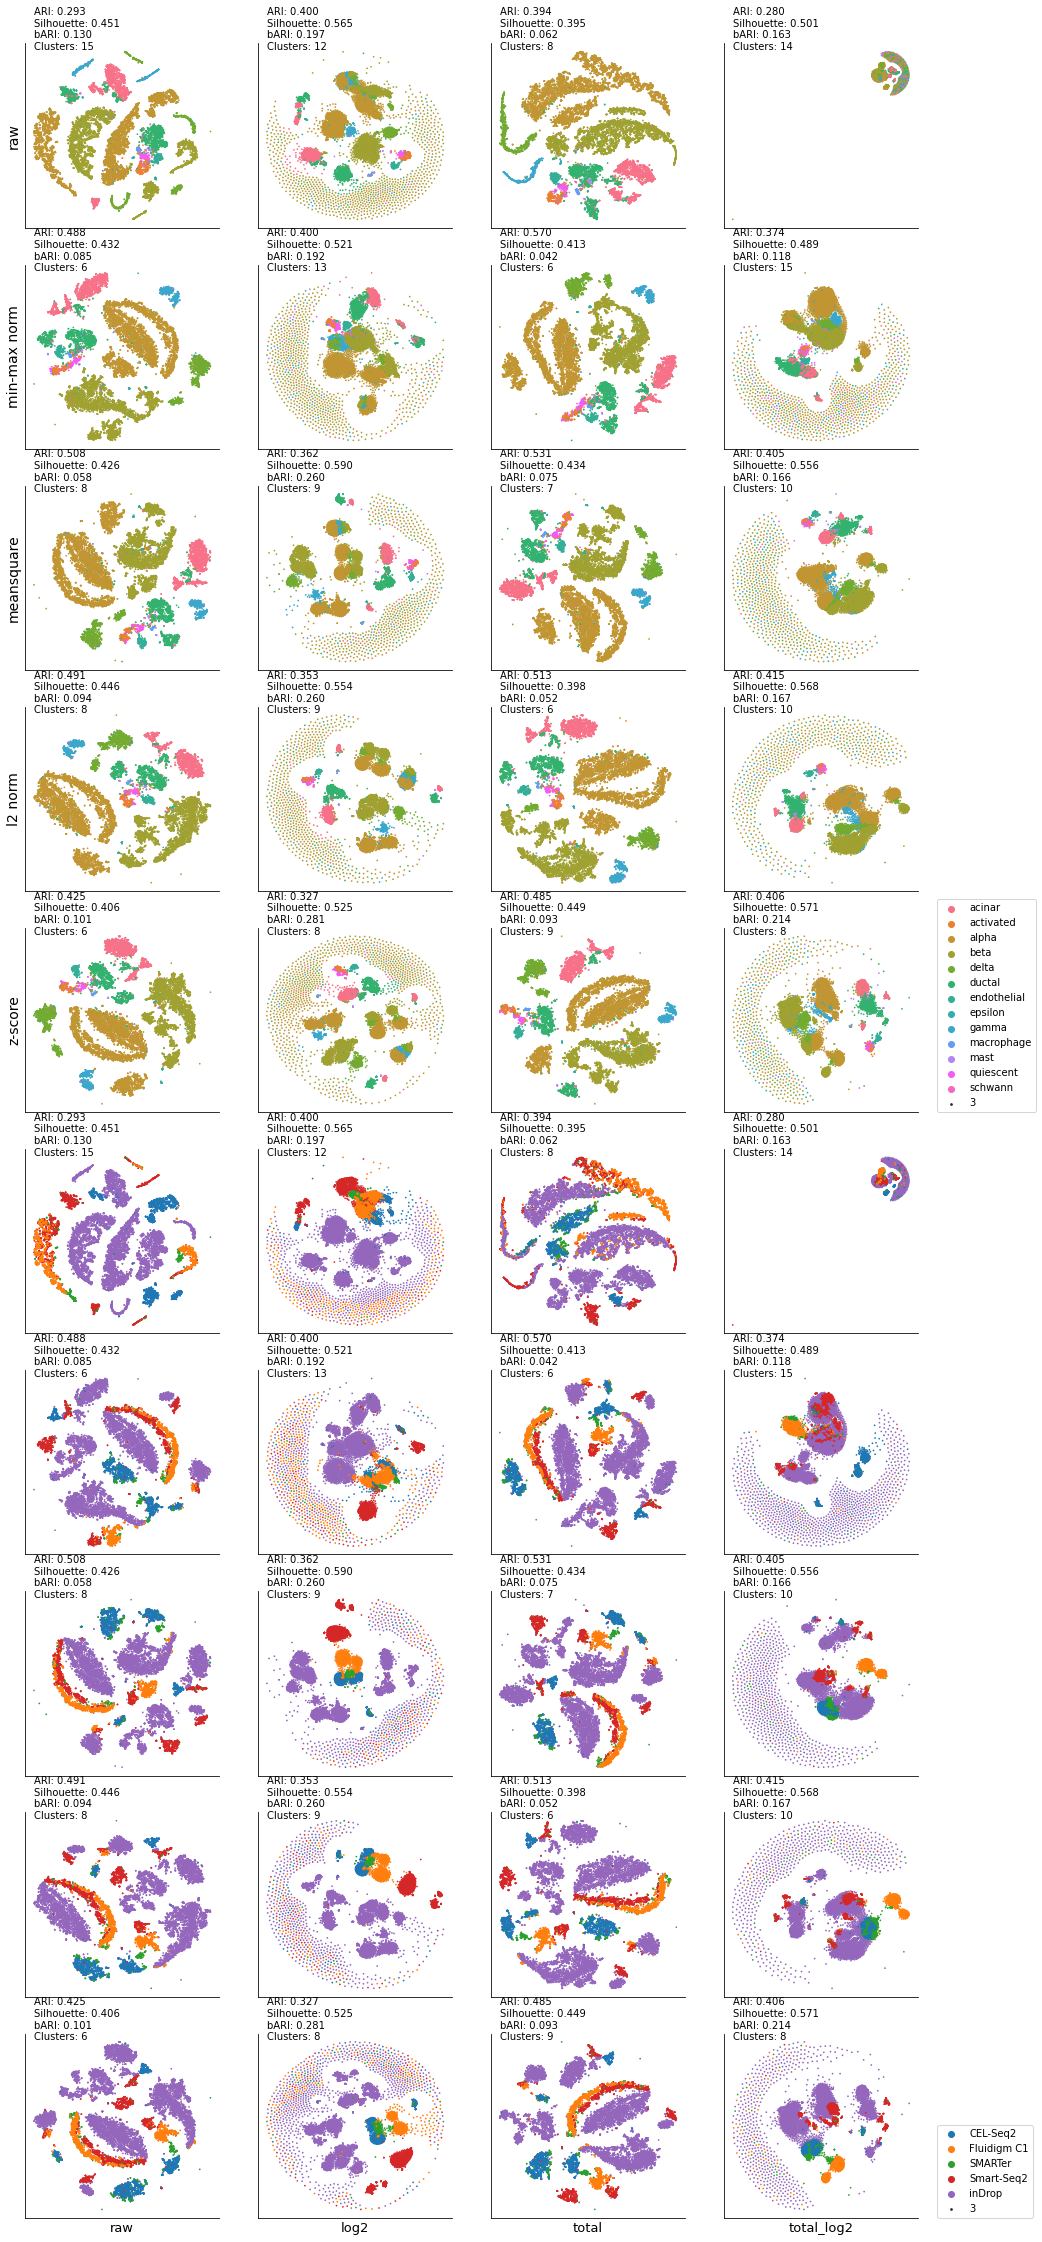

In [18]:
total_data2=total_data
labels2 = labels
blabels2 = blabels

latent_space = TSNE(n_components=2)
#latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'kmean'

############################################
plt.figure(figsize=(16,40))
ax00 = plt.subplot2grid((10,4), (0,0)) 
ax10 = plt.subplot2grid((10,4), (0,1))  
ax20 = plt.subplot2grid((10,4), (0,2))  
ax30 = plt.subplot2grid((10,4), (0,3))  

ax01 = plt.subplot2grid((10,4), (1,0)) 
ax11 = plt.subplot2grid((10,4), (1,1))  
ax21 = plt.subplot2grid((10,4), (1,2))  
ax31 = plt.subplot2grid((10,4), (1,3))  

ax02 = plt.subplot2grid((10,4), (2,0)) 
ax12 = plt.subplot2grid((10,4), (2,1))  
ax22 = plt.subplot2grid((10,4), (2,2))  
ax32 = plt.subplot2grid((10,4), (2,3))  

ax03 = plt.subplot2grid((10,4), (3,0)) 
ax13 = plt.subplot2grid((10,4), (3,1))  
ax23 = plt.subplot2grid((10,4), (3,2))  
ax33 = plt.subplot2grid((10,4), (3,3))

ax04 = plt.subplot2grid((10,4), (4,0)) 
ax14 = plt.subplot2grid((10,4), (4,1))  
ax24 = plt.subplot2grid((10,4), (4,2))  
ax34 = plt.subplot2grid((10,4), (4,3))

ax05 = plt.subplot2grid((10,4), (5,0)) 
ax15 = plt.subplot2grid((10,4), (5,1))  
ax25 = plt.subplot2grid((10,4), (5,2))  
ax35 = plt.subplot2grid((10,4), (5,3))  

ax06 = plt.subplot2grid((10,4), (6,0)) 
ax16 = plt.subplot2grid((10,4), (6,1))  
ax26 = plt.subplot2grid((10,4), (6,2))  
ax36 = plt.subplot2grid((10,4), (6,3))  

ax07 = plt.subplot2grid((10,4), (7,0)) 
ax17 = plt.subplot2grid((10,4), (7,1))  
ax27 = plt.subplot2grid((10,4), (7,2))  
ax37 = plt.subplot2grid((10,4), (7,3))  

ax08 = plt.subplot2grid((10,4), (8,0)) 
ax18 = plt.subplot2grid((10,4), (8,1))  
ax28 = plt.subplot2grid((10,4), (8,2))  
ax38 = plt.subplot2grid((10,4), (8,3))

ax09 = plt.subplot2grid((10,4), (9,0)) 
ax19 = plt.subplot2grid((10,4), (9,1))  
ax29 = plt.subplot2grid((10,4), (9,2))  
ax39 = plt.subplot2grid((10,4), (9,3))

l = []
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_cp(total_data2), \
         ax00, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax05)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_log(df_cp(total_data2)), \
         ax10, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax15)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_total20000(df_cp(total_data2)), \
         ax20, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax25)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_log(df_total20000(df_cp(total_data2))), \
         ax30, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax35)
        )
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_minmax(df_cp(total_data2)), \
         ax01, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax06)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_minmax(df_log(df_cp(total_data2))), \
         ax11, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax16)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data2))), \
         ax21, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax26)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data2)))), \
         ax31, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax36)
        )
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_meansquare(df_cp(total_data2)), \
         ax02, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax07)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_meansquare(df_log(df_cp(total_data2))), \
         ax12, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax17)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data2))), \
         ax22, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax27)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data2)))), \
         ax32, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax37)
        )
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_l2norm(df_cp(total_data2)), \
         ax03, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax08)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_l2norm(df_log(df_cp(total_data2))), \
         ax13, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax18)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data2))), \
         ax23, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax28)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data2)))), \
         ax33, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax38)
        )
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_zscore(df_cp(total_data2)), \
         ax04, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax09)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_zscore(df_log(df_cp(total_data2))), \
         ax14, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax19)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data2))), \
         ax24, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax29)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data2)))), \
         ax34, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax39)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax09.set_xlabel('raw', fontsize=13)
ax19.set_xlabel('log2', fontsize=13)
ax29.set_xlabel('total', fontsize=13)
ax39.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)
ax39.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

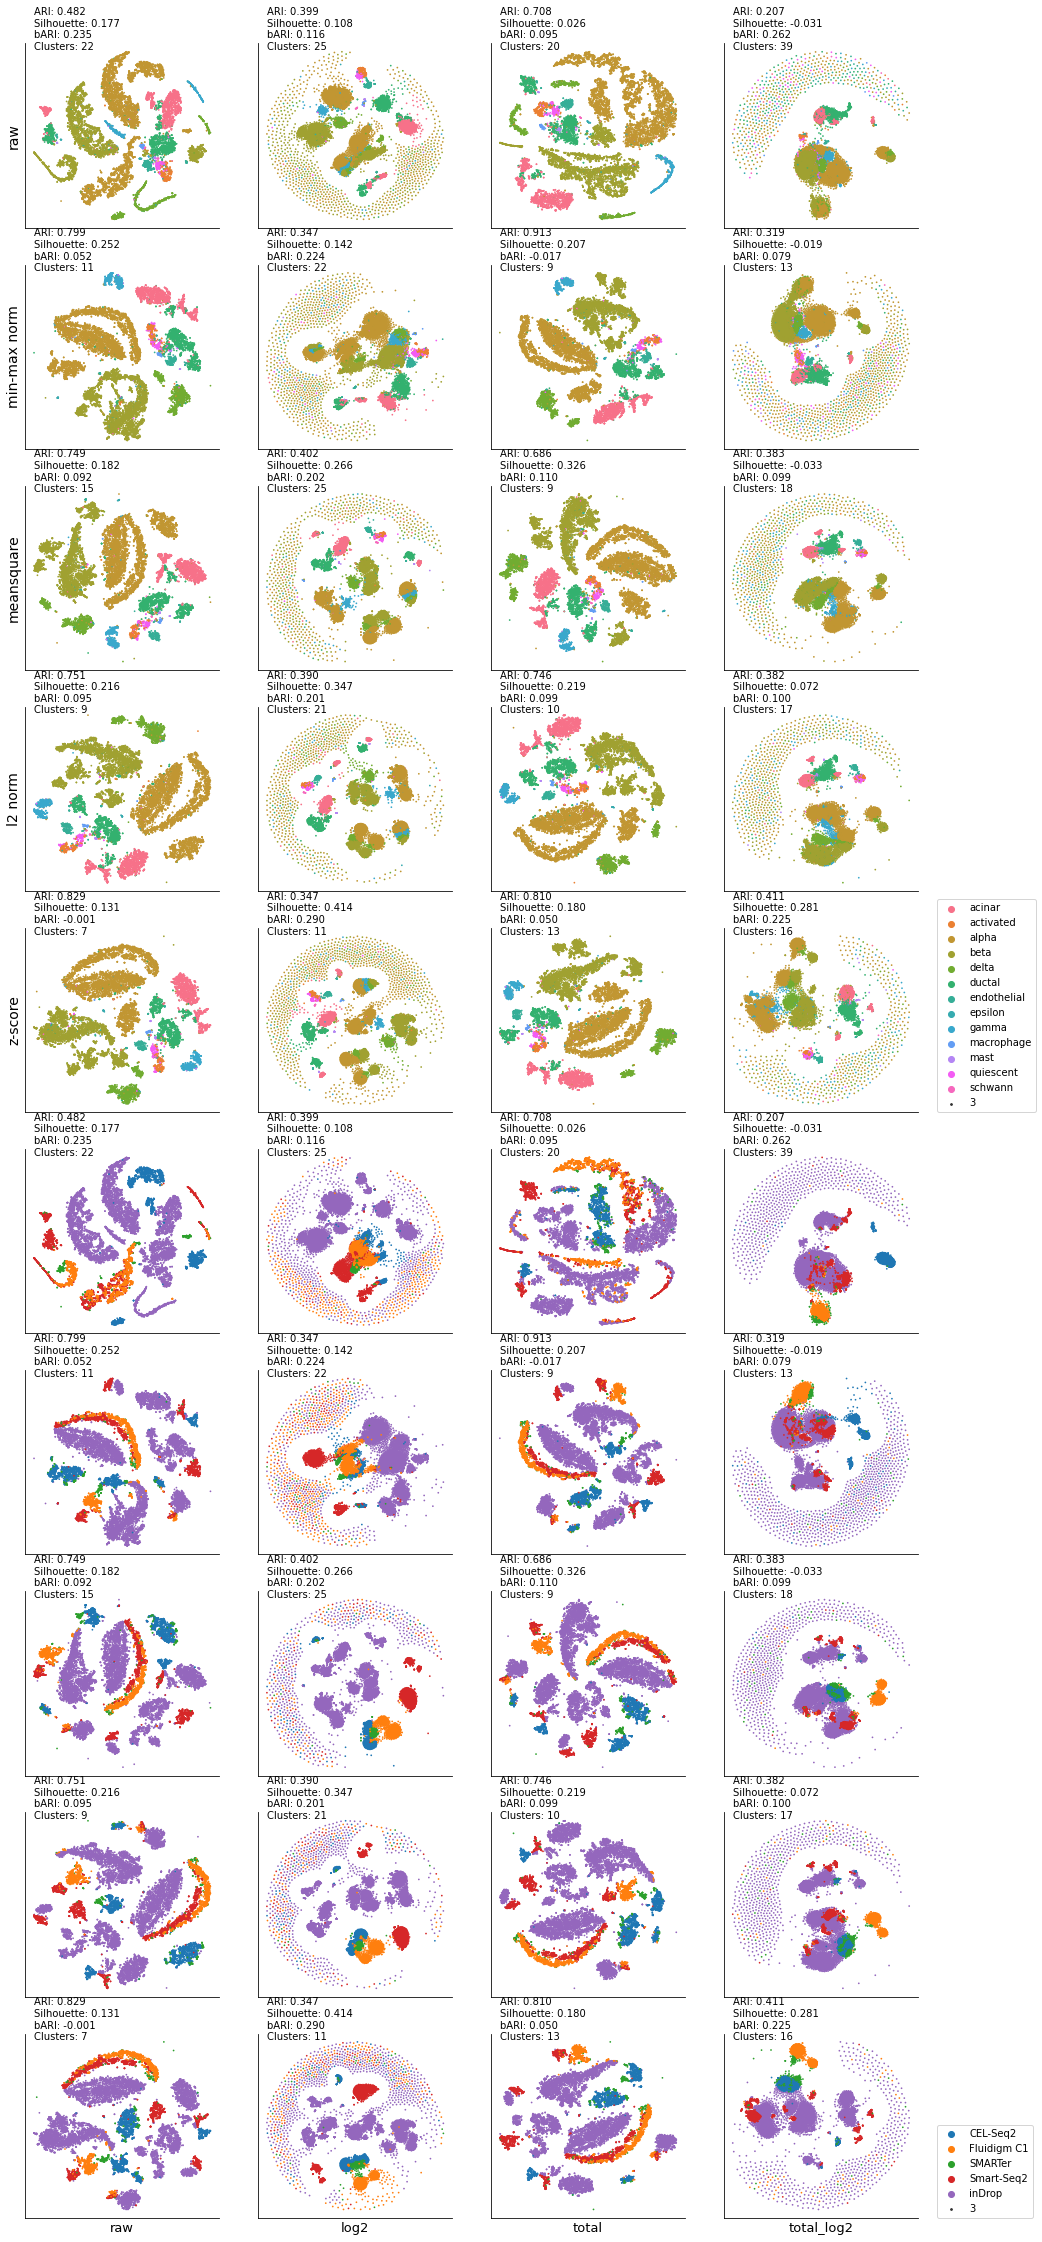

In [19]:
total_data2=total_data
labels2 = labels
blabels2 = blabels


latent_space = TSNE(n_components=2)
#latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'dbscan'

############################################
plt.figure(figsize=(16,40))
ax00 = plt.subplot2grid((10,4), (0,0)) 
ax10 = plt.subplot2grid((10,4), (0,1))  
ax20 = plt.subplot2grid((10,4), (0,2))  
ax30 = plt.subplot2grid((10,4), (0,3))  

ax01 = plt.subplot2grid((10,4), (1,0)) 
ax11 = plt.subplot2grid((10,4), (1,1))  
ax21 = plt.subplot2grid((10,4), (1,2))  
ax31 = plt.subplot2grid((10,4), (1,3))  

ax02 = plt.subplot2grid((10,4), (2,0)) 
ax12 = plt.subplot2grid((10,4), (2,1))  
ax22 = plt.subplot2grid((10,4), (2,2))  
ax32 = plt.subplot2grid((10,4), (2,3))  

ax03 = plt.subplot2grid((10,4), (3,0)) 
ax13 = plt.subplot2grid((10,4), (3,1))  
ax23 = plt.subplot2grid((10,4), (3,2))  
ax33 = plt.subplot2grid((10,4), (3,3))

ax04 = plt.subplot2grid((10,4), (4,0)) 
ax14 = plt.subplot2grid((10,4), (4,1))  
ax24 = plt.subplot2grid((10,4), (4,2))  
ax34 = plt.subplot2grid((10,4), (4,3))

ax05 = plt.subplot2grid((10,4), (5,0)) 
ax15 = plt.subplot2grid((10,4), (5,1))  
ax25 = plt.subplot2grid((10,4), (5,2))  
ax35 = plt.subplot2grid((10,4), (5,3))  

ax06 = plt.subplot2grid((10,4), (6,0)) 
ax16 = plt.subplot2grid((10,4), (6,1))  
ax26 = plt.subplot2grid((10,4), (6,2))  
ax36 = plt.subplot2grid((10,4), (6,3))  

ax07 = plt.subplot2grid((10,4), (7,0)) 
ax17 = plt.subplot2grid((10,4), (7,1))  
ax27 = plt.subplot2grid((10,4), (7,2))  
ax37 = plt.subplot2grid((10,4), (7,3))  

ax08 = plt.subplot2grid((10,4), (8,0)) 
ax18 = plt.subplot2grid((10,4), (8,1))  
ax28 = plt.subplot2grid((10,4), (8,2))  
ax38 = plt.subplot2grid((10,4), (8,3))

ax09 = plt.subplot2grid((10,4), (9,0)) 
ax19 = plt.subplot2grid((10,4), (9,1))  
ax29 = plt.subplot2grid((10,4), (9,2))  
ax39 = plt.subplot2grid((10,4), (9,3))

l = []
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_cp(total_data2), \
         ax00, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax05)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_log(df_cp(total_data2)), \
         ax10, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax15)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_total20000(df_cp(total_data2)), \
         ax20, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax25)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_log(df_total20000(df_cp(total_data2))), \
         ax30, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax35)
        )
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_minmax(df_cp(total_data2)), \
         ax01, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax06)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_minmax(df_log(df_cp(total_data2))), \
         ax11, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax16)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data2))), \
         ax21, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax26)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data2)))), \
         ax31, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax36)
        )
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_meansquare(df_cp(total_data2)), \
         ax02, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax07)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_meansquare(df_log(df_cp(total_data2))), \
         ax12, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax17)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data2))), \
         ax22, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax27)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data2)))), \
         ax32, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax37)
        )
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_l2norm(df_cp(total_data2)), \
         ax03, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax08)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_l2norm(df_log(df_cp(total_data2))), \
         ax13, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax18)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data2))), \
         ax23, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax28)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data2)))), \
         ax33, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax38)
        )
############################################
latent_space = TSNE(n_components=2)
l.append(run_plot(df_zscore(df_cp(total_data2)), \
         ax04, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax09)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_zscore(df_log(df_cp(total_data2))), \
         ax14, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax19)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data2))), \
         ax24, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax29)
        )
latent_space = TSNE(n_components=2)
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data2)))), \
         ax34, labels2, latent_space, clustering_method, blabels=blabels2, b_ax=ax39)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax09.set_xlabel('raw', fontsize=13)
ax19.set_xlabel('log2', fontsize=13)
ax29.set_xlabel('total', fontsize=13)
ax39.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)
ax39.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

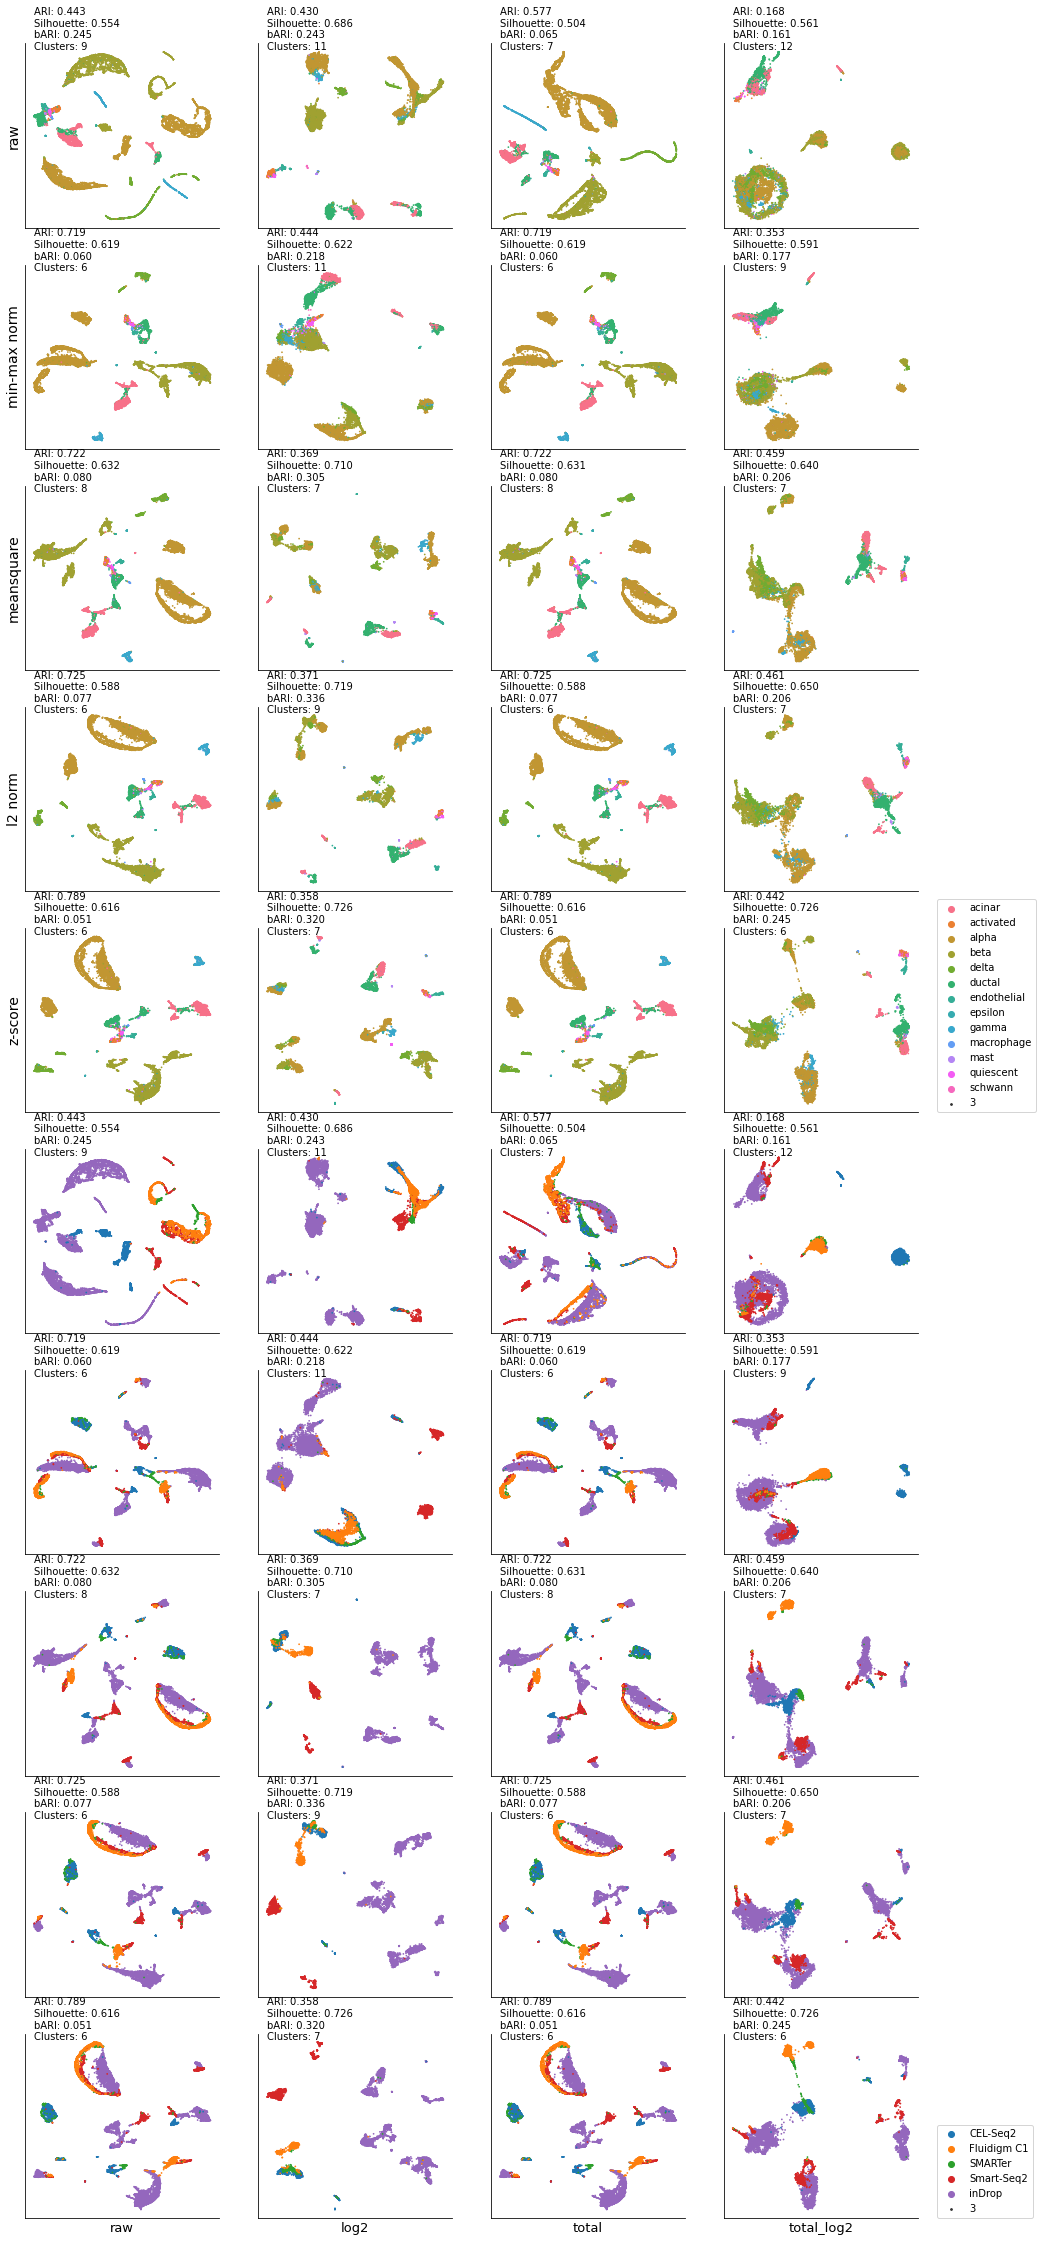

In [20]:
clustering_method = 'kmean'

############################################https://github.com/iron-lion/tmp_model/blob/master/README.md
plt.figure(figsize=(16,40))
ax00 = plt.subplot2grid((10,4), (0,0)) 
ax10 = plt.subplot2grid((10,4), (0,1))  
ax20 = plt.subplot2grid((10,4), (0,2))  
ax30 = plt.subplot2grid((10,4), (0,3))  

ax01 = plt.subplot2grid((10,4), (1,0)) 
ax11 = plt.subplot2grid((10,4), (1,1))  
ax21 = plt.subplot2grid((10,4), (1,2))  
ax31 = plt.subplot2grid((10,4), (1,3))  

ax02 = plt.subplot2grid((10,4), (2,0)) 
ax12 = plt.subplot2grid((10,4), (2,1))  
ax22 = plt.subplot2grid((10,4), (2,2))  
ax32 = plt.subplot2grid((10,4), (2,3))  

ax03 = plt.subplot2grid((10,4), (3,0)) 
ax13 = plt.subplot2grid((10,4), (3,1))  
ax23 = plt.subplot2grid((10,4), (3,2))  
ax33 = plt.subplot2grid((10,4), (3,3))

ax04 = plt.subplot2grid((10,4), (4,0)) 
ax14 = plt.subplot2grid((10,4), (4,1))  
ax24 = plt.subplot2grid((10,4), (4,2))  
ax34 = plt.subplot2grid((10,4), (4,3))

ax05 = plt.subplot2grid((10,4), (5,0)) 
ax15 = plt.subplot2grid((10,4), (5,1))  
ax25 = plt.subplot2grid((10,4), (5,2))  
ax35 = plt.subplot2grid((10,4), (5,3))  

ax06 = plt.subplot2grid((10,4), (6,0)) 
ax16 = plt.subplot2grid((10,4), (6,1))  
ax26 = plt.subplot2grid((10,4), (6,2))  
ax36 = plt.subplot2grid((10,4), (6,3))  

ax07 = plt.subplot2grid((10,4), (7,0)) 
ax17 = plt.subplot2grid((10,4), (7,1))  
ax27 = plt.subplot2grid((10,4), (7,2))  
ax37 = plt.subplot2grid((10,4), (7,3))  

ax08 = plt.subplot2grid((10,4), (8,0)) 
ax18 = plt.subplot2grid((10,4), (8,1))  
ax28 = plt.subplot2grid((10,4), (8,2))  
ax38 = plt.subplot2grid((10,4), (8,3))

ax09 = plt.subplot2grid((10,4), (9,0)) 
ax19 = plt.subplot2grid((10,4), (9,1))  
ax29 = plt.subplot2grid((10,4), (9,2))  
ax39 = plt.subplot2grid((10,4), (9,3))

l = []
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax05)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax15)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax25)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax35)
        )
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax06)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax16)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax26)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax36)
        )
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax07)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax17)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax27)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax37)
        )
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax08)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax18)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax28)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax38)
        )
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax09)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax19)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax29)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax39)
        )

############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax09.set_xlabel('raw', fontsize=13)
ax19.set_xlabel('log2', fontsize=13)
ax29.set_xlabel('total', fontsize=13)
ax39.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)
ax39.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

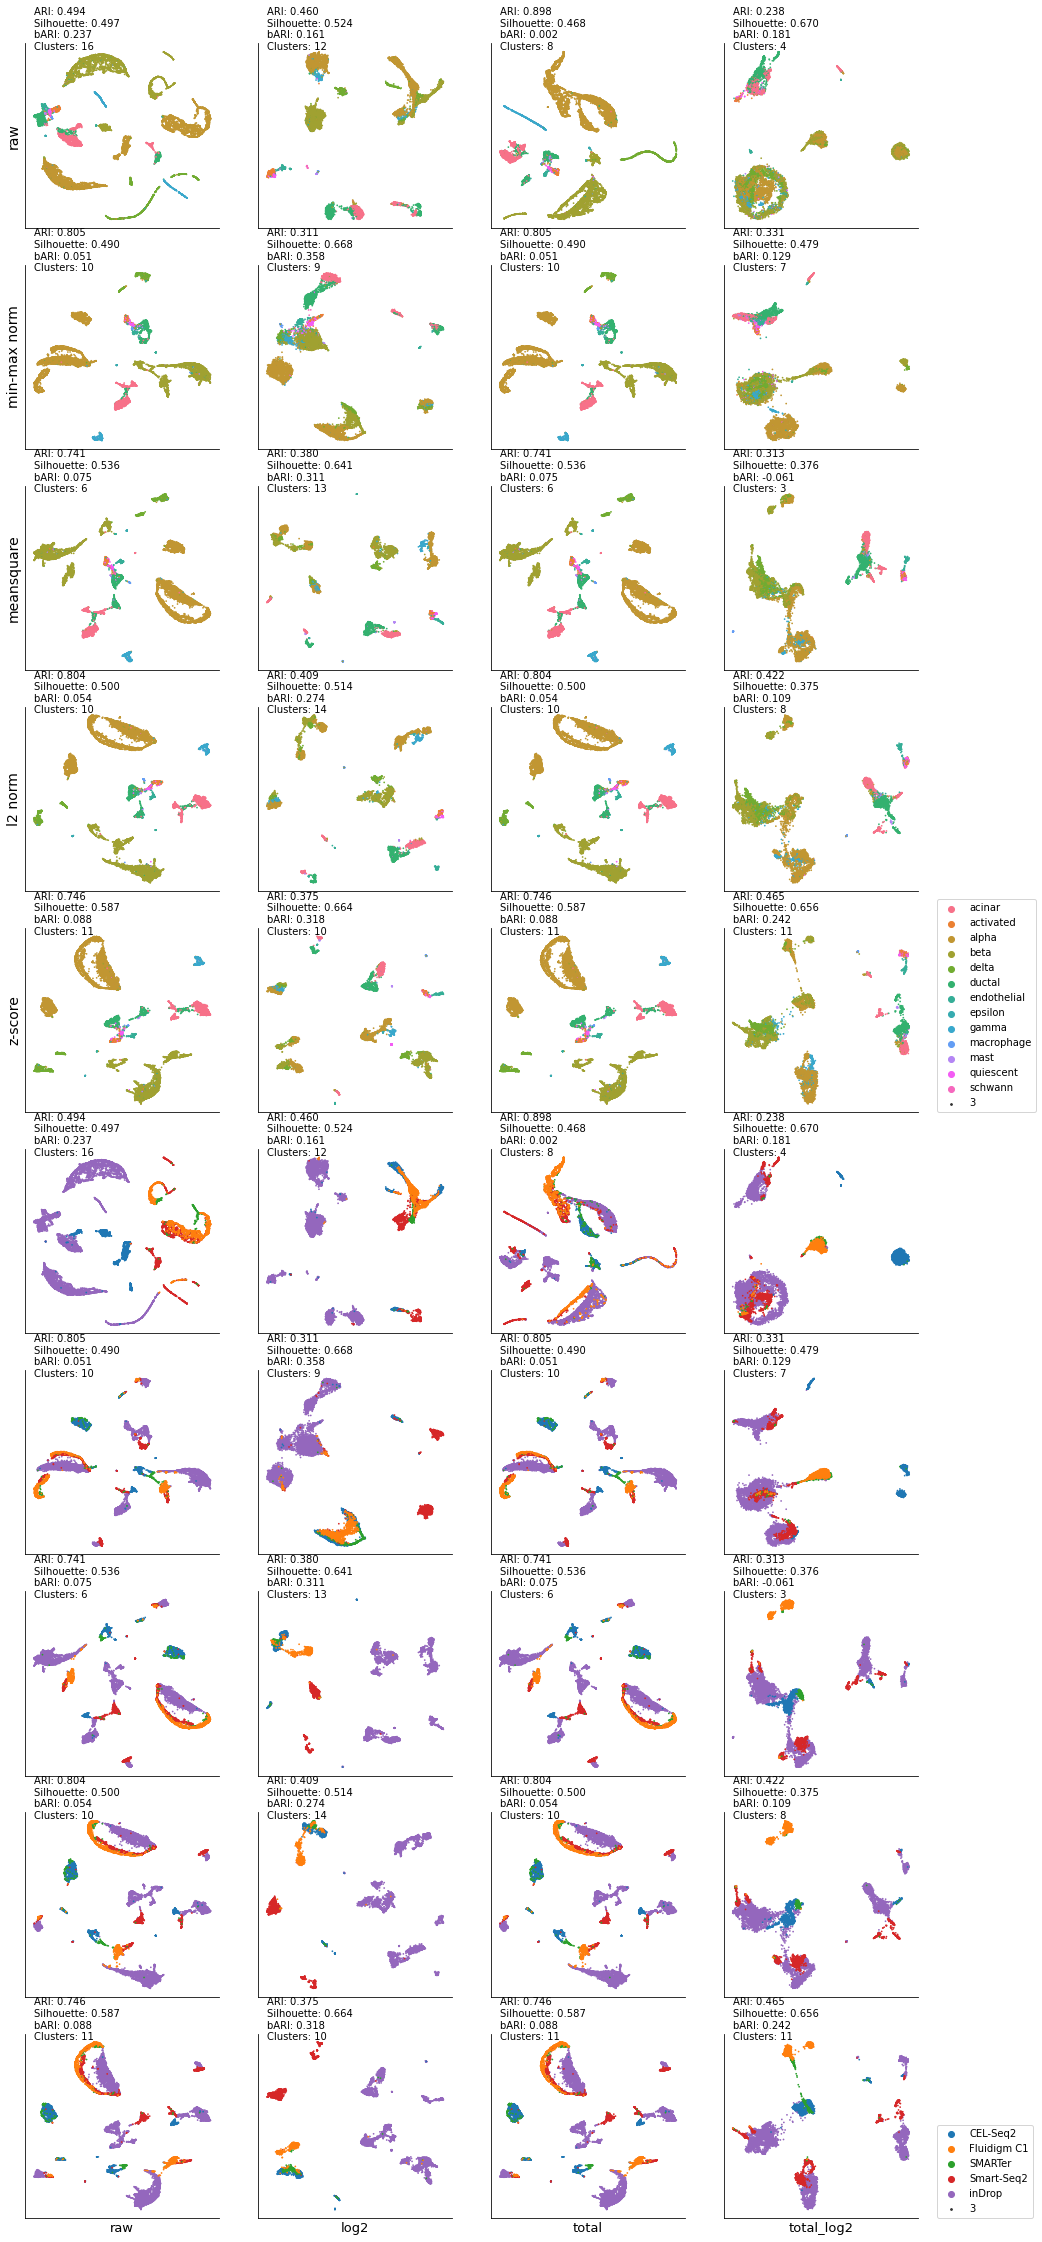

In [18]:
clustering_method = 'dbscan'

############################################https://github.com/iron-lion/tmp_model/blob/master/README.md
plt.figure(figsize=(16,40))
ax00 = plt.subplot2grid((10,4), (0,0)) 
ax10 = plt.subplot2grid((10,4), (0,1))  
ax20 = plt.subplot2grid((10,4), (0,2))  
ax30 = plt.subplot2grid((10,4), (0,3))  

ax01 = plt.subplot2grid((10,4), (1,0)) 
ax11 = plt.subplot2grid((10,4), (1,1))  
ax21 = plt.subplot2grid((10,4), (1,2))  
ax31 = plt.subplot2grid((10,4), (1,3))  

ax02 = plt.subplot2grid((10,4), (2,0)) 
ax12 = plt.subplot2grid((10,4), (2,1))  
ax22 = plt.subplot2grid((10,4), (2,2))  
ax32 = plt.subplot2grid((10,4), (2,3))  

ax03 = plt.subplot2grid((10,4), (3,0)) 
ax13 = plt.subplot2grid((10,4), (3,1))  
ax23 = plt.subplot2grid((10,4), (3,2))  
ax33 = plt.subplot2grid((10,4), (3,3))

ax04 = plt.subplot2grid((10,4), (4,0)) 
ax14 = plt.subplot2grid((10,4), (4,1))  
ax24 = plt.subplot2grid((10,4), (4,2))  
ax34 = plt.subplot2grid((10,4), (4,3))

ax05 = plt.subplot2grid((10,4), (5,0)) 
ax15 = plt.subplot2grid((10,4), (5,1))  
ax25 = plt.subplot2grid((10,4), (5,2))  
ax35 = plt.subplot2grid((10,4), (5,3))  

ax06 = plt.subplot2grid((10,4), (6,0)) 
ax16 = plt.subplot2grid((10,4), (6,1))  
ax26 = plt.subplot2grid((10,4), (6,2))  
ax36 = plt.subplot2grid((10,4), (6,3))  

ax07 = plt.subplot2grid((10,4), (7,0)) 
ax17 = plt.subplot2grid((10,4), (7,1))  
ax27 = plt.subplot2grid((10,4), (7,2))  
ax37 = plt.subplot2grid((10,4), (7,3))  

ax08 = plt.subplot2grid((10,4), (8,0)) 
ax18 = plt.subplot2grid((10,4), (8,1))  
ax28 = plt.subplot2grid((10,4), (8,2))  
ax38 = plt.subplot2grid((10,4), (8,3))

ax09 = plt.subplot2grid((10,4), (9,0)) 
ax19 = plt.subplot2grid((10,4), (9,1))  
ax29 = plt.subplot2grid((10,4), (9,2))  
ax39 = plt.subplot2grid((10,4), (9,3))

l = []
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax05)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax15)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax25)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax35)
        )
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax06)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax16)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax26)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax36)
        )
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax07)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax17)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax27)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax37)
        )
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax08)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax18)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax28)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax38)
        )
############################################
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax09)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax19)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax29)
        )
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method, blabels=blabels, b_ax=ax39)
        )

############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax09.set_xlabel('raw', fontsize=13)
ax19.set_xlabel('log2', fontsize=13)
ax29.set_xlabel('total', fontsize=13)
ax39.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)
ax39.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)